In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset/data

## Load Data

In [3]:
ALL_PRODUCTS_FILEPATH = Path.cwd() / '..' / 'amazon_data_files' / 'Amazon-Products.csv'
AIR_CONDITIONERS_FILEPATH = Path.cwd() / '..' / 'amazon_data_files' / 'Air Conditioners.csv'

In [4]:
all_products = pd.read_csv(ALL_PRODUCTS_FILEPATH)
all_products

,Unnamed: 0,Name,main Category,Sub category,image,link,ratings,no of Ratings,discount price,actual price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


### Dealing with column names

In [5]:
# Drop columns not providing important information
all_products = all_products.drop('Unnamed: 0', axis=1)

In [6]:
# Keep all column names in same format
all_products.columns = all_products.columns.str.lower().str.strip().str.replace(' ','_')

In [7]:
all_products.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [8]:
# Number of columns and rows
all_products.shape

(551585, 9)

## Data Cleaning


### Checking for Missing Data

In [9]:
all_products.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [10]:
all_products.isnull().mean()

name              0.000000
main_category     0.000000
sub_category      0.000000
image             0.000000
link              0.000000
ratings           0.318707
no_of_ratings     0.318707
discount_price    0.110886
actual_price      0.032294
dtype: float64

In [11]:
# Identifying columns in the dataframe where over 80% of the values are missing
all_products.columns[all_products.isnull().mean() > 0.8]

# There is no columns with more than 80% of data with missing values so there's no need to filter out any column

Index([], dtype='object')


### Checking for Data Types

In [12]:
all_products.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"


In [13]:
# Displaying the data types of each column in the dataframe
all_products.dtypes

name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

The last 4 column should be numerical, however, discount_price and actual_price containg non-numerical characters that need to be removed. After that they can be converted to float values.

In [14]:
# Remove '₹' symbol:
all_products['discount_price'] = all_products['discount_price'].str.split('₹').str[1]
all_products['actual_price'] = all_products['actual_price'].str.split('₹').str[1]


In [15]:
# Remove commas and convert to float values
all_products['discount_price'] = all_products['discount_price'].str.replace(',', '').astype(float)
all_products['actual_price'] = all_products['actual_price'].str.replace(',', '').astype(float)


In [16]:
# Convert ratings and no_of_ratings to float values. Let's see first what kind of values they contain
all_products['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [17]:
# The following values: 'Get','FREE','₹68.99', '₹65','₹70', '₹100', '₹99', '₹2.99' need to be removed. Let's see in how many rows they appear

search_values = ['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99']

occurrences = {}
for value in search_values:
    occurrences[value] = all_products['ratings'].str.contains(value).sum()

# Print the occurrences
for key, value in occurrences.items():
    print(f"Occurrences of '{key}' in 'ratings' is: {value}")


Occurrences of 'Get' in 'ratings' is: 4852
Occurrences of 'FREE' in 'ratings' is: 1357
Occurrences of '₹68.99' in 'ratings' is: 1
Occurrences of '₹65' in 'ratings' is: 1
Occurrences of '₹70' in 'ratings' is: 5
Occurrences of '₹100' in 'ratings' is: 1
Occurrences of '₹99' in 'ratings' is: 14
Occurrences of '₹2.99' in 'ratings' is: 2


The number of rows represent less than 10% of total number of rows, so let's remove them

In [18]:
df_to_remove = all_products['ratings'].astype(str).str.contains('|'.join(search_values))  # '|' joins the elements of the search_values list into a single string separated by '|'. astype(str) is to avoid problems using ~ later

# Filter the DataFrame to exclude rows with any of the search values in the 'ratings' column:
all_products = all_products[~df_to_remove]
all_products['ratings'] = all_products['ratings'].astype(float)
all_products['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, nan, 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.5, 1. , 2.6,
       2.8, 2.3, 1.7, 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2. , 1.4, 2.1, 1.2,
       1.3, 1.5, 1.1])

In [19]:
all_products['no_of_ratings'] = all_products['no_of_ratings'].str.replace(',','').astype(float)

In [20]:
all_products.dtypes

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object

## EDA

From a customer perspective, the most important columns are: 1) Price 2) Rating 3) Manufacturer 4) Description 5) Customer reviews\
Since price and rating are crucial in our further analysis, let's drop missing values the corresponding columns. 

In [21]:
all_products.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     60647
actual_price       17813
dtype: int64

In [22]:
all_products2 = all_products.dropna(subset=['ratings','no_of_ratings','discount_price','actual_price'])
all_products2.isnull().sum()


name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

### Extract manufacturer information

Manufacturer column can be created from information in name column.

In [23]:
all_products2.head(2)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0


In [24]:
# all_products2['manufacturer'] = all_products2['name'].str.split(' ').str[0]
# This way of obtaining manufacturer names does not work for multiple companies whose names start with 'The', for that reason a function is created to avoid getting those kind of words.

In [25]:
def extract_manufacturer(name):
    # Split the name into words
    words = name.split()
    
    # Exclude some common terms 
    common_terms = ['The', 'by', 'at', 'from', 'for']
    
    # Find the first non-common term
    for word in words:
        if word not in common_terms:
            return word
    
    # Return None if no non-common term is found
    return None

In [26]:
all_products2['manufacturer'] = all_products2['name'].apply(extract_manufacturer)
all_products2.head(2)

C:\Users\juan_\AppData\Local\Temp\ipykernel_18116\3912578488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_products2['manufacturer'] = all_products2['name'].apply(extract_manufacturer)


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,Lloyd
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,LG


In [27]:
# It is more convenient to have the manufacturer column at the beginning of the dataframe
cols = all_products2.columns.tolist()
cols

['name',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price',
 'manufacturer']

In [28]:
cols = ['name',
 'manufacturer',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price']

In [29]:
all_products2 = all_products2[cols]
all_products2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            334963 non-null  object 
 1   manufacturer    334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  334963 non-null  float64
 9   actual_price    334963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 28.1+ MB


### Extract the net discount amount and discount percentage

In [30]:
all_products2['net_discount'] = all_products2['actual_price'] - all_products2['discount_price']
all_products2['discount_percent'] = 1 - all_products2['discount_price']/all_products2['actual_price']
all_products2.head(2)

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,25991.0,0.440600
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,29500.0,0.388209


### Info about manufactures and their prices

In [31]:
# Manufactures and their average product prices
all_products2.groupby('manufacturer').agg(mean_price = ('actual_price','mean')).sort_values(by='mean_price', ascending=False)

,mean_price
manufacturer,
Marutivilla,4.950001e+09
DENON,2.129000e+05
IMALENT,1.900000e+05
XGIMI,1.899077e+05
Mijia,1.849990e+05
...,...
Too,2.000000e+01
"Sprite,",2.000000e+01
BRU,1.000000e+01


In [32]:
# Most expensive product
all_products2[all_products2['actual_price'] == all_products2['actual_price'].max()]#['name']

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
194625,"Marutivilla Insect Killer, Mosquito Killer Lig...",Marutivilla,home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Marutivilla-Mosquito-Suc...,2.0,1.0,589.0,9.900000e+09,9.899999e+09,1.0


In [33]:
# Cheapest product/products
all_products2[all_products2['actual_price'] == all_products2['actual_price'].min()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
23172,"Bingo! Tedhe Medhe Masala Tadka, 50g, Spindle ...",Bingo!,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bingo-Tedhe-Medhe-Masala...,4.5,289.0,9.0,10.0,1.0,0.1
124233,"BRU Instant Coffee Sachet,Ground, 8g",BRU,grocery & gourmet foods,"Coffee, Tea & Beverages",https://m.media-amazon.com/images/I/61nqvhwCKp...,https://www.amazon.in/BRU-Instant-Coffee-Sache...,4.0,7.0,8.0,10.0,2.0,0.2
268602,Rin Detergent Bar - 165g,Rin,beauty & health,Household Supplies,https://m.media-amazon.com/images/I/81ufvQZfLH...,https://www.amazon.in/RIN-Invictus_RiDBa165g-R...,4.0,44.0,9.0,10.0,1.0,0.1
437600,"Kurkure Yummy Cheese Puffcorn Namkeen, 28g",Kurkure,grocery & gourmet foods,Snack Foods,https://m.media-amazon.com/images/I/71SjZUrMws...,https://www.amazon.in/Kurkure-Yummy-Cheese-Puf...,4.4,1485.0,9.0,10.0,1.0,0.1
437604,"Lay's Potato Chips 24g/27g, West Indies Hot 'n...",Lay's,grocery & gourmet foods,Snack Foods,https://m.media-amazon.com/images/I/718mIkrmCf...,https://www.amazon.in/Lays-Sweet-Chilli-Potato...,4.3,864.0,9.0,10.0,1.0,0.1
437916,"Cadbury Oreo Original Vanilla Creme Biscuit, 4...",Cadbury,grocery & gourmet foods,Snack Foods,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Cadbury-Oreo-Vanilla-Cr%...,4.4,1353.0,9.0,10.0,1.0,0.1


### TOP10 Most popular manufacturers:

In [34]:
top10_manufacturers = all_products2['manufacturer'].value_counts().keys().to_list()[:10]
top10_values = all_products2['manufacturer'].value_counts().to_list()[:10]

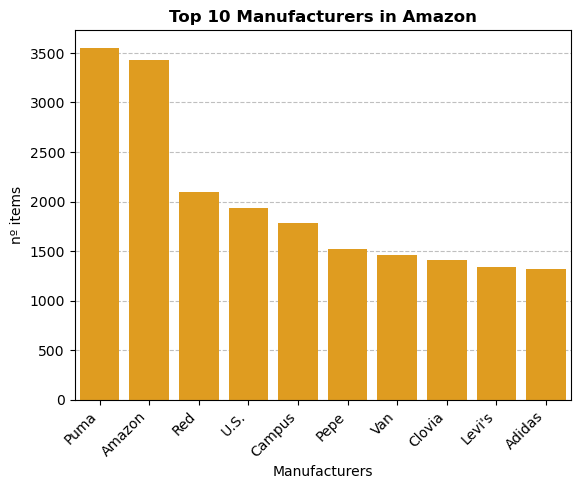

In [35]:
sns.barplot(x = top10_manufacturers, y = top10_values, color='orange', zorder = 2) # zorder keeps horizontal lines behind the bars
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder = 1, color='grey')
plt.xlabel('Manufacturers')
plt.ylabel('nº items')
plt.title('Top 10 Manufacturers in Amazon', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

According to the bar chart above, Puma is the most popular manufacturer.

### Average rating in top 10 manufacturers:

In [36]:
# Creating a dataframe with TOP10 manufacterers:
df_top10 = all_products2[all_products2['manufacturer'].isin(top10_manufacturers)]
df_top10

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
65,"Amazon Basics 1 Ton, 5 Star, Wi-Fi Enabled Sma...",Amazon,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51s3yrWntM...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.6,88.0,28990.00,49089.0,20099.00,0.409440
83,"Amazon Basics 1.5 Ton, 5 Star, Wi-Fi Enabled S...",Amazon,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51s3yrWntM...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.4,39.0,34990.00,56179.0,21189.00,0.377169
112,Amazon Basics 1 Ton 4 Star Fixed Speed Window ...,Amazon,appliances,Air Conditioners,https://m.media-amazon.com/images/I/91BcgKPL5x...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.5,14.0,25490.00,33990.0,8500.00,0.250074
1057,Amazon Basics 300 W Hand Blender with Stainles...,Amazon,appliances,All Appliances,https://m.media-amazon.com/images/I/517er3i6s6...,https://www.amazon.in/Amazon-Basics-Stainless-...,4.0,182.0,899.00,1999.0,1100.00,0.550275
1093,"Amazon Brand Solimo Laundry Basket with Lid, 5...",Amazon,appliances,All Appliances,https://m.media-amazon.com/images/I/81WR7HNbOC...,https://www.amazon.in/Amazon-Brand-Solimo-Laun...,2.6,39.0,829.00,1059.0,230.00,0.217186
...,...,...,...,...,...,...,...,...,...,...,...,...
551547,Adidas Men's Cotton Mhs Fz Sta Track Tops (H16...,Adidas,sports & fitness,Yoga,https://m.media-amazon.com/images/I/81xR72S349...,https://www.amazon.in/Adidas-Cotton-Track-H166...,3.6,5.0,1449.00,4599.0,3150.00,0.684932
551549,Adidas Men's Standard,Adidas,sports & fitness,Yoga,https://m.media-amazon.com/images/I/61nxNPQMxv...,https://www.amazon.in/Adidas-Polyester-Track-H...,3.0,2.0,4949.00,6599.0,1650.00,0.250038
551568,Adidas Men's Standard,Adidas,sports & fitness,Yoga,https://m.media-amazon.com/images/I/715IyINuD-...,https://www.amazon.in/Adidas-Polyester-Tkjkt-T...,3.4,16.0,1349.00,4299.0,2950.00,0.686206
551572,Amazon Brand - Symactive Men Shorts,Amazon,sports & fitness,Yoga,https://m.media-amazon.com/images/I/81q+k3dsJg...,https://www.amazon.in/Amazon-Brand-Symactive-P...,5.0,2.0,655.04,2399.0,1743.96,0.726953


In [37]:
pd.DataFrame(df_top10.groupby('manufacturer').agg('ratings').mean().sort_values(ascending=False))

,ratings
manufacturer,
Van,3.944422
Amazon,3.940234
Puma,3.914077
Adidas,3.867678
Levi's,3.855082
U.S.,3.823259
Campus,3.812296
Red,3.731996
Pepe,3.713827


According with the above information, the highest rated brand is Van, followed by Amazon and Puma.

### Most popular categories in TOP10 manufacturers:

In [38]:
# All categories in top10 manufacturers:
df_top10['main_category'].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', "kids' fashion", 'toys & baby products',
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing"], dtype=object)

In [39]:
category_names = df_top10['main_category'].value_counts().keys()
category_values = df_top10['main_category'].value_counts()

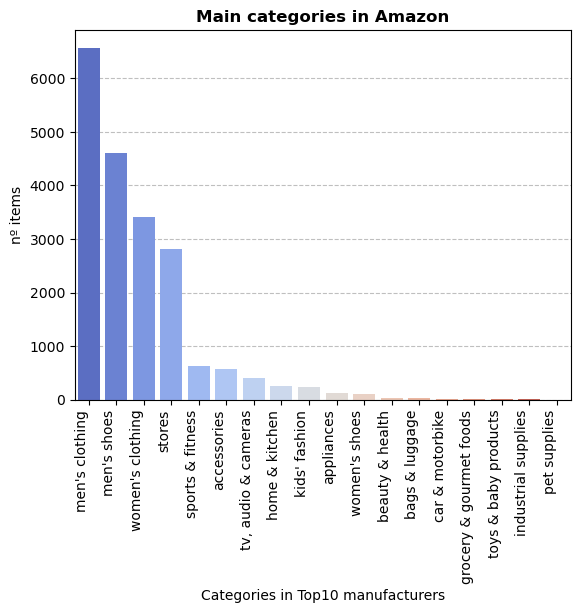

In [40]:
sns.barplot(x=category_names, y=category_values, palette='coolwarm', zorder=2)
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder = 1, color='grey')
plt.xlabel('Categories in Top10 manufacturers')
plt.ylabel('nº items')
plt.title('Main categories in Amazon', fontweight='bold')
plt.xticks(rotation = 90, ha= 'right')
plt.show()

The most popular category in Top10 manufacturers is men's clothing.\
Let's create a df with TOP10 most popular manufacturers and 5 most popular categories

In [41]:
top5_categories = df_top10['main_category'].value_counts().keys().to_list()[:5]
print(top5_categories)
print(top10_manufacturers)

["men's clothing", "men's shoes", "women's clothing", 'stores', 'sports & fitness']
['Puma', 'Amazon', 'Red', 'U.S.', 'Campus', 'Pepe', 'Van', 'Clovia', "Levi's", 'Adidas']


In [42]:
df_top10_5 = df_top10[df_top10['main_category'].isin(top5_categories)]
df_top10_5


,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
21238,Adidas Unisex Low Cut Cotton Blend Socks (Pack...,Adidas,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/81GffNsMvx...,https://www.amazon.in/Adidas-Original-Cushion-...,4.0,224.0,539.00,549.0,10.00,0.018215
21250,Amazon Brand - Symactive Rubber Coated Hex Dum...,Amazon,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/81nZnXUMtj...,https://www.amazon.in/Amazon-Brand-Symactive-R...,4.5,511.0,1569.00,3100.0,1531.00,0.493871
21275,Puma polyester 23 Cms Gym Bag(7572229_Pink_X_Red),Puma,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PUMA-Polyester-Bridal-Ro...,4.1,249.0,789.00,1499.0,710.00,0.473649
21318,Van Heusen Athleisure Men Regular Fit Track Pa...,Van,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/711tuDPz5U...,https://www.amazon.in/Van-Heusen-Cotton-50043_...,4.0,6299.0,909.00,1399.0,490.00,0.350250
21362,Adidas unisex-adult Socks,Adidas,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/71yxNDWaya...,https://www.amazon.in/Adidas-Unisex-Light-Dz93...,4.5,264.0,599.00,999.0,400.00,0.400400
...,...,...,...,...,...,...,...,...,...,...,...,...
551547,Adidas Men's Cotton Mhs Fz Sta Track Tops (H16...,Adidas,sports & fitness,Yoga,https://m.media-amazon.com/images/I/81xR72S349...,https://www.amazon.in/Adidas-Cotton-Track-H166...,3.6,5.0,1449.00,4599.0,3150.00,0.684932
551549,Adidas Men's Standard,Adidas,sports & fitness,Yoga,https://m.media-amazon.com/images/I/61nxNPQMxv...,https://www.amazon.in/Adidas-Polyester-Track-H...,3.0,2.0,4949.00,6599.0,1650.00,0.250038
551568,Adidas Men's Standard,Adidas,sports & fitness,Yoga,https://m.media-amazon.com/images/I/715IyINuD-...,https://www.amazon.in/Adidas-Polyester-Tkjkt-T...,3.4,16.0,1349.00,4299.0,2950.00,0.686206
551572,Amazon Brand - Symactive Men Shorts,Amazon,sports & fitness,Yoga,https://m.media-amazon.com/images/I/81q+k3dsJg...,https://www.amazon.in/Amazon-Brand-Symactive-P...,5.0,2.0,655.04,2399.0,1743.96,0.726953


Let's create another df with top10 subcategories and check average rating and price:

In [43]:
top10_subcategories = df_top10_5['sub_category'].value_counts().keys().to_list()[:10]
top10_subcategories

['Sports Shoes',
 'Shirts',
 'T-shirts & Polos',
 'Casual Shoes',
 'Jeans',
 "Men's Fashion",
 'Lingerie & Nightwear',
 'Sportswear',
 'Western Wear',
 'Clothing']

In [44]:
top10_subcategories_values = df_top10_5['sub_category'].value_counts().to_list()[:10]

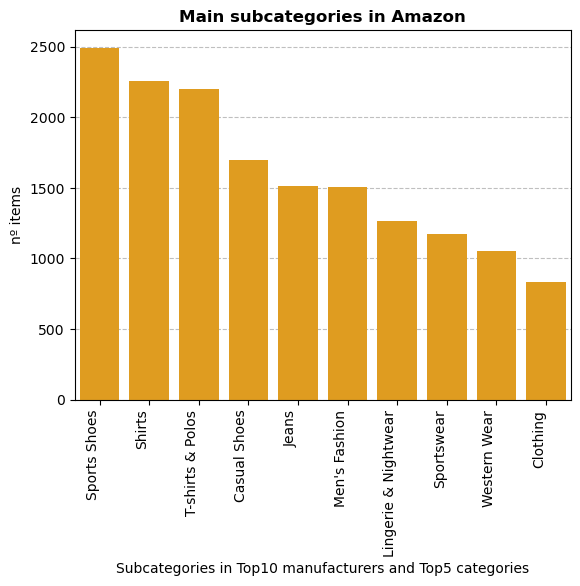

In [45]:
sns.barplot(x=top10_subcategories, y=top10_subcategories_values, color = 'orange', zorder=2)
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder = 1, color='grey')
plt.xlabel('Subcategories in Top10 manufacturers and Top5 categories')
plt.ylabel('nº items')
plt.title('Main subcategories in Amazon', fontweight='bold')
plt.xticks(rotation = 90, ha= 'right')
plt.show()

The most popular subcategory is Sports Shoes, followed by Shirts and T-shirts & Polos

In [46]:
df_top10_5_10 = df_top10_5[df_top10_5['sub_category'].isin(top10_subcategories)]
df_top10_5_10

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,net_discount,discount_percent
85206,Puma Mens Cliff Idp Low Boot,Puma,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/71P6Ez1pDe...,https://www.amazon.in/Puma-Cliff-Casual-Shoe-9...,4.0,281.0,1709.00,3499.0,1790.00,0.511575
85221,Red Tape Men's Chelsea Boots,Red,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/61vKUYLUfG...,https://www.amazon.in/Red-Tape-Leather-Chelsea...,3.9,592.0,1824.00,7299.0,5475.00,0.750103
85233,Red Tape Men Black Sneaker,Red,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Red-Tape-Mens-White-Snea...,3.7,42.0,1399.00,5599.0,4200.00,0.750134
85236,Red Tape Men's Ankle Length Boots- Elevated Lo...,Red,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Red-Tape-Ankle-Length-Bo...,4.0,738.0,1890.00,7599.0,5709.00,0.751283
85239,Puma Unisex-Adult Duke Walking Shoe,Puma,men's shoes,Casual Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Puma-Unisex-Adult-Mist-D...,4.1,163.0,1679.00,3999.0,2320.00,0.580145
...,...,...,...,...,...,...,...,...,...,...,...,...
548262,Van Heusen Woman Women's Regular Fit T-Shirt,Van,women's clothing,Western Wear,https://m.media-amazon.com/images/I/61RTH0TUT-...,https://www.amazon.in/Van-Heusen-Woman-Regular...,4.3,11.0,229.00,599.0,370.00,0.617696
548264,Van Heusen Women's Solid Regular fit T-Shirt (...,Van,women's clothing,Western Wear,https://m.media-amazon.com/images/I/71AX6MbHz0...,https://www.amazon.in/Van-Heusen-Woman-Regular...,3.8,23.0,315.32,599.0,283.68,0.473589
548268,Amazon Brand - Symbol Women T-Shirt,Amazon,women's clothing,Western Wear,https://m.media-amazon.com/images/I/81t6MT7C9s...,https://www.amazon.in/Amazon-Brand-Striped-Reg...,4.1,89.0,441.00,1199.0,758.00,0.632193
548286,Van Heusen Women Lounge T-Shirt - Modal Cotton...,Van,women's clothing,Western Wear,https://m.media-amazon.com/images/I/71-q2mMPr2...,https://www.amazon.in/Van-Heusen-Womens-55403_...,3.9,24.0,437.00,689.0,252.00,0.365747


### Summary statistics in TOP10 manufacturers | TOP5 categories | TOP10 subcategories

**Centrality and Dispersion Measures**

Mean

In [47]:
print(f"The average rating in Top10 subcategories is {df_top10_5_10['ratings'].mean().round(2)}")
print(f"The average price in Top10 subcategories is {df_top10_5_10['actual_price'].mean().round(2)}")
print(f"The average discount in Top10 subcategories is {df_top10_5_10['discount_percent'].mean().round(2)*100}%")

The average rating in Top10 subcategories is 3.82
The average price in Top10 subcategories is 2943.48
The average discount in Top10 subcategories is 50.0%


Median

In [56]:
print(f"The median rating in Top10 subcategories is {df_top10_5_10['ratings'].median()}")
print(f"The median price in Top10 subcategories is {df_top10_5_10['actual_price'].median()}")
print(f"The median discount in Top10 subcategories is {df_top10_5_10['discount_percent'].median()*100}%")

The median rating in Top10 subcategories is 3.9
The median price in Top10 subcategories is 2299.0
The median discount in Top10 subcategories is 51.157473563875385%


Mode

In [54]:
print(f"The most frequent (mode) rating in Top10 subcategories is {df_top10_5_10['ratings'].mode()}")
print(f"The most frequent (mode) price in Top10 subcategories is {df_top10_5_10['actual_price'].mode()}")
print(f"The most frequent (mode) discount in Top10 subcategories is {df_top10_5_10['discount_percent'].mode().round(2)*100}%")

The most frequent (mode) rating in Top10 subcategories is 0    4.0
Name: ratings, dtype: float64
The most frequent (mode) price in Top10 subcategories is 0    1999.0
Name: actual_price, dtype: float64
The most frequent (mode) discount in Top10 subcategories is 0    57.0
Name: discount_percent, dtype: float64%


Measures of Dispersion in price

In [60]:
print(f"The variance in price is {df_top10_5_10['actual_price'].var()}")
print(f"The standard deviation in price is {df_top10_5_10['actual_price'].std()}")
print(f"The max price is {df_top10_5_10['actual_price'].max()}")
print(f"The min price is {df_top10_5_10['actual_price'].min()}")
print(f"The range in price is {df_top10_5_10['actual_price'].max() - df_top10_5_10['actual_price'].min()}")

df_top10_5_10['actual_price'].quantile([0.25, 0.5, 0.75])

The variance in price is 4546109.064025052
The standard deviation in price is 2132.1606562417037
The max price is 19999.0
The min price is 215.0
The range in price is 19784.0


0.25    1499.0
0.50    2299.0
0.75    3999.0
Name: actual_price, dtype: float64

**Comments regarding price:**
- Notably, the median price is lower than the mean price, suggesting a skew in the distribution of sale prices towards higher values.
- The standard deviation is `2132`, what indicates that sale prices can vary significantly from the average.
- The minimum and maximum sale prices are `215` and `19999`, respectively, highlighting a wide range of property values in the dataset.
- The interquartile range (IQR), given by the values at 25% (Q1) and 75% (Q3), is between `1499` and `3999`. This means that 50% of the houses in the dataset were sold within this price range.

**Shape of the Distribution in price**


In [62]:
skewness_price = df_top10_5_10['actual_price'].skew()
kurtosis_price = df_top10_5_10['actual_price'].kurtosis()

skewness_price, kurtosis_price

(1.9118639286886372, 5.781232317228021)

**Insights**:

1. **Skewness**: The positive value of skewness (1.91) for the 'actual_price' indicates that the distribution is right-skewed. This means that the tail on the right side (higher prices) is longer than the left side (lower prices). In practical terms, this suggests that there are a significant number of products that are sold at higher prices, which are acting as outliers and pulling the mean upwards.
  
2. **Kurtosis**: The kurtosis value of 5.78 is greater than 3, which indicates that the price distribution has heavier tails and a sharper peak compared to a normal distribution. This means that there are more outliers (extreme values) in prices than one would expect in a normally distributed set.

The skewness and kurtosis values suggest that there are some products that are sold at significantly higher prices than the majority, and these are affecting the overall distribution of prices in the dataset.

#### Price distribution across products from TOP10 manufacturers | TOP5 categories | TOP10 subcategories